In [1]:
import matplotlib.pyplot as plt

from sleep_stage_lib.datamanip import import_app5_dataset, apply_filter_per_file
from sleep_stage_lib.feature_extraction import extract_features_and_labels
from sleep_stage_lib.filtering import bandpass_filter
from sleep_stage_lib.modeling.train_that_is_not_script_bc_wtf_why_the_train_we_have_is_a_script import \
    train_and_eval_eog_random_forest

2025-04-22 15:04:34.419 | INFO     | sleep_stage_lib.config:<module>:11 - PROJ_ROOT path is: C:\Users\pavel\PycharmProjects\dtek2093_sleep_stage_classification


In [2]:
df = import_app5_dataset()
df = df.dropna(subset=['emg'])
df = df.dropna(subset=['eog'])
# Show a preview
print(df.head())

    eog  emg  stage    set           file
0  39.0  3.0  awake  Train  0_subj_10.csv
1  36.0  4.0  awake  Train  0_subj_10.csv
2  36.0  2.0  awake  Train  0_subj_10.csv
3  40.0 -5.0  awake  Train  0_subj_10.csv
4  46.0 -2.0  awake  Train  0_subj_10.csv


In [3]:
df = apply_filter_per_file(df, bandpass_filter, column='eog', lowcut=0.5, highcut=50, fs=200, order=4)
df = apply_filter_per_file(df, bandpass_filter, column='emg', lowcut=20, highcut=99, fs=200, order=4)
print(df.head())

        eog       emg   stage    set          file
0  1.158572  0.015736  nonrem  Train  0_subj_1.csv
1  6.277940  4.449334  nonrem  Train  0_subj_1.csv
2  8.120397 -2.208466  nonrem  Train  0_subj_1.csv
3  6.385139 -3.317598  nonrem  Train  0_subj_1.csv
4  3.723779  5.086204  nonrem  Train  0_subj_1.csv


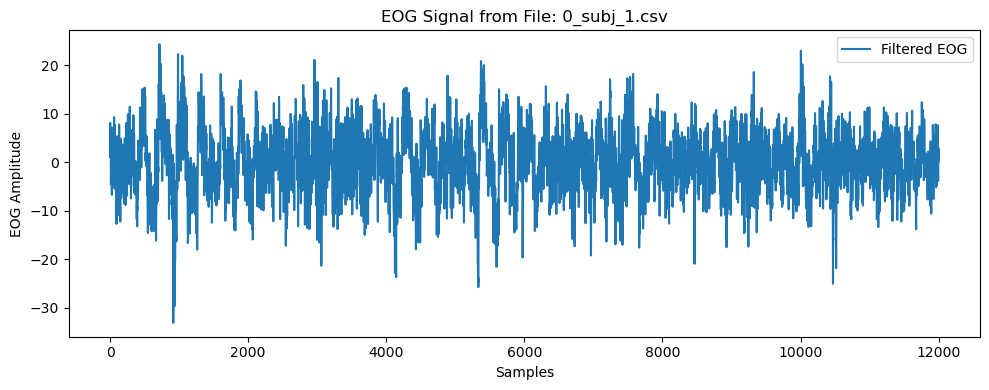

In [4]:
# Choose one file (using the first unique file as an example)
file_id = df['file'].unique()[0]
file_data = df[df['file'] == file_id]

plt.figure(figsize=(10, 4))
plt.plot(file_data.index, file_data['eog'], label='Filtered EOG')
plt.title(f'EOG Signal from File: {file_id}')
plt.xlabel('Samples')
plt.ylabel('EOG Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
# Extract features per file from your full_df (which contains columns 'file', 'stage', and cleaned 'eog')
features_eog, labels_eog = extract_features_and_labels(df, signal_column='eog', label_column='stage')
features_emg, labels_emg = extract_features_and_labels(df, signal_column='emg', label_column='stage')
features = features_eog.join(features_emg, lsuffix='_eog', rsuffix='_emg')
labels = labels_eog

In [6]:
# Evaluate on the test set
accuracy, report = train_and_eval_eog_random_forest(features, labels)
print("Accuracy:", accuracy)
print(report)

Optimal features: 54
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Accuracy: 0.8418803418803419
              precision    recall  f1-score   support

       awake       0.93      0.85      0.89        99
      nonrem       0.71      0.89      0.79        73
         rem       0.91      0.77      0.83        62

    accuracy                           0.84       234
   macro avg       0.85      0.84      0.84       234
weighted avg       0.86      0.84      0.84       234



In [7]:
'''Full Code:
df = import_app5_dataset()
df = df.drop(columns=["emg"])
df = df.dropna(subset=['eog'])
df = apply_filter_per_file(df, bandpass_filter, column='eog', lowcut=0.5, highcut=50, fs=200, order=4)
features, labels = extract_features_and_labels_from_dataset(df, signal_column='eog', label_column='stage')
accuracy, report = train_and_eval_eog_random_forest(features, labels)
print("Accuracy:", accuracy)
print(report)
'''


'Full Code:\ndf = import_app5_dataset()\ndf = df.drop(columns=["emg"])\ndf = df.dropna(subset=[\'eog\'])\ndf = apply_filter_per_file(df, bandpass_filter, column=\'eog\', lowcut=0.5, highcut=50, fs=200, order=4)\nfeatures, labels = extract_features_and_labels_from_dataset(df, signal_column=\'eog\', label_column=\'stage\')\naccuracy, report = train_and_eval_eog_random_forest(features, labels)\nprint("Accuracy:", accuracy)\nprint(report)\n'